In [1]:
import pandas as pd
import numpy as np

import folium
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt

# This line tells iPython to not display warnings.
import warnings
warnings.filterwarnings('ignore') 

In [2]:
housing = pd.read_csv('ACSDP5Y2019_DP04.csv')
housing = housing.iloc[1: , :]
employment = pd.read_csv('ACSDP5Y2019_DP03.csv')
employment = employment.iloc[1: , :]

In [3]:
housing.head()

,DP04_0001E,DP04_0001M,DP04_0001PE,DP04_0001PM,DP04_0002E,DP04_0002M,DP04_0002PE,DP04_0002PM,DP04_0003E,DP04_0003M,...,DP04_0142E,DP04_0142M,DP04_0142PE,DP04_0142PM,DP04_0143E,DP04_0143M,DP04_0143PE,DP04_0143PM,GEO_ID,NAME
1,1949,124,1949,(X),1843,133,94.6,3.7,106,72,...,45,31,21.8,14.9,45,31,(X),(X),1400000US18001030100,"Census Tract 301, Adams County, Indiana"
2,2496,137,2496,(X),2331,149,93.4,4.5,165,114,...,316,179,45.1,19.8,84,54,(X),(X),1400000US18001030200,"Census Tract 302, Adams County, Indiana"
3,2510,153,2510,(X),2267,166,90.3,5.5,243,143,...,57,51,8.6,7.7,37,34,(X),(X),1400000US18001030300,"Census Tract 303, Adams County, Indiana"
4,1188,102,1188,(X),1161,110,97.7,3.6,27,43,...,10,16,32.3,42.8,10,15,(X),(X),1400000US18001030400,"Census Tract 304, Adams County, Indiana"
5,1590,96,1590,(X),1515,93,95.3,3.3,75,54,...,14,15,13.5,14.4,43,25,(X),(X),1400000US18001030500,"Census Tract 305, Adams County, Indiana"


In [4]:
employment.head()

,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0001PM,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,DP03_0003E,DP03_0003M,...,DP03_0136E,DP03_0136M,DP03_0136PE,DP03_0136PM,DP03_0137E,DP03_0137M,DP03_0137PE,DP03_0137PM,GEO_ID,NAME
1,3698,243,3698,(X),2468,203,66.7,3.5,2468,203,...,(X),(X),2.1,1.7,(X),(X),5,3.6,1400000US18001030100,"Census Tract 301, Adams County, Indiana"
2,3923,302,3923,(X),2282,352,58.2,6.6,2282,352,...,(X),(X),17.9,11.3,(X),(X),36.7,9.6,1400000US18001030200,"Census Tract 302, Adams County, Indiana"
3,4269,288,4269,(X),2878,332,67.4,4.9,2878,332,...,(X),(X),3.3,3,(X),(X),17.1,7.4,1400000US18001030300,"Census Tract 303, Adams County, Indiana"
4,2403,249,2403,(X),1494,190,62.2,6.1,1494,190,...,(X),(X),8,6.6,(X),(X),27.6,19.7,1400000US18001030400,"Census Tract 304, Adams County, Indiana"
5,4080,284,4080,(X),2719,270,66.6,3.3,2719,270,...,(X),(X),23.8,6.6,(X),(X),4.5,4.8,1400000US18001030500,"Census Tract 305, Adams County, Indiana"


In [5]:
housing = housing.set_index('GEO_ID')
employment = employment.set_index('GEO_ID')

In [6]:
housing.head()

,DP04_0001E,DP04_0001M,DP04_0001PE,DP04_0001PM,DP04_0002E,DP04_0002M,DP04_0002PE,DP04_0002PM,DP04_0003E,DP04_0003M,...,DP04_0141PM,DP04_0142E,DP04_0142M,DP04_0142PE,DP04_0142PM,DP04_0143E,DP04_0143M,DP04_0143PE,DP04_0143PM,NAME
GEO_ID,,,,,,,,,,,,,,,,,,,,,
1400000US18001030100,1949,124,1949,(X),1843,133,94.6,3.7,106,72,...,14.6,45,31,21.8,14.9,45,31,(X),(X),"Census Tract 301, Adams County, Indiana"
1400000US18001030200,2496,137,2496,(X),2331,149,93.4,4.5,165,114,...,11.9,316,179,45.1,19.8,84,54,(X),(X),"Census Tract 302, Adams County, Indiana"
1400000US18001030300,2510,153,2510,(X),2267,166,90.3,5.5,243,143,...,4.8,57,51,8.6,7.7,37,34,(X),(X),"Census Tract 303, Adams County, Indiana"
1400000US18001030400,1188,102,1188,(X),1161,110,97.7,3.6,27,43,...,53.3,10,16,32.3,42.8,10,15,(X),(X),"Census Tract 304, Adams County, Indiana"
1400000US18001030500,1590,96,1590,(X),1515,93,95.3,3.3,75,54,...,4.3,14,15,13.5,14.4,43,25,(X),(X),"Census Tract 305, Adams County, Indiana"


In [7]:
employment.head()

,DP03_0001E,DP03_0001M,DP03_0001PE,DP03_0001PM,DP03_0002E,DP03_0002M,DP03_0002PE,DP03_0002PM,DP03_0003E,DP03_0003M,...,DP03_0135PM,DP03_0136E,DP03_0136M,DP03_0136PE,DP03_0136PM,DP03_0137E,DP03_0137M,DP03_0137PE,DP03_0137PM,NAME
GEO_ID,,,,,,,,,,,,,,,,,,,,,
1400000US18001030100,3698,243,3698,(X),2468,203,66.7,3.5,2468,203,...,1.8,(X),(X),2.1,1.7,(X),(X),5,3.6,"Census Tract 301, Adams County, Indiana"
1400000US18001030200,3923,302,3923,(X),2282,352,58.2,6.6,2282,352,...,3.6,(X),(X),17.9,11.3,(X),(X),36.7,9.6,"Census Tract 302, Adams County, Indiana"
1400000US18001030300,4269,288,4269,(X),2878,332,67.4,4.9,2878,332,...,9.7,(X),(X),3.3,3,(X),(X),17.1,7.4,"Census Tract 303, Adams County, Indiana"
1400000US18001030400,2403,249,2403,(X),1494,190,62.2,6.1,1494,190,...,1.6,(X),(X),8,6.6,(X),(X),27.6,19.7,"Census Tract 304, Adams County, Indiana"
1400000US18001030500,4080,284,4080,(X),2719,270,66.6,3.3,2719,270,...,11.1,(X),(X),23.8,6.6,(X),(X),4.5,4.8,"Census Tract 305, Adams County, Indiana"


In [8]:
# When trying to convent the columns to numeric, it thrown error that some of the values at certain 
# indices were just '-', thus had to specifically replace them with 0 (zero) before converting the columns to numeric.

# Find the indices using the guven code

#print (housing.DP04_0047PE[pd.to_numeric(housing.DP04_0047PE, errors='coerce').isnull()]) 
 

indices = ['1400000US18089990000', '1400000US18091990000', '1400000US18127980001', '1400000US18127980002', '1400000US18127990000', '1400000US18157010400']
columns = ["DP04_0058PE", "DP04_0077PE", "DP04_0047PE"]
housing.loc[indices, columns] = 0 


In [9]:
# When trying to convent the columns to numeric, it thrown error that some of the values at certain 
# indices were just '-', thus had to specifically replace them with 0 (zero) before converting the columns to numeric.

# Find the indices using the given code

#print (employment.DP03_0005PE[pd.to_numeric(employment.DP03_0005PE, errors='coerce').isnull()])

indices = ['1400000US18089990000', '1400000US18091990000', '1400000US18127980001', '1400000US18127980002', '1400000US18127990000']
columns = ["DP03_0005PE"]
employment.loc[indices, columns] = 0 


In [10]:
housing[["DP04_0058PE", "DP04_0077PE", "DP04_0047PE"]] = housing[["DP04_0058PE", "DP04_0077PE", "DP04_0047PE"]].apply(pd.to_numeric)
employment[["DP03_0005PE"]] = employment[["DP03_0005PE"]].apply(pd.to_numeric) 


In [11]:
housing['no_car'] = (housing['DP04_0058PE'])** 0.5 

In [12]:
housing['over_crowded'] = np.log((100 - (housing['DP04_0077PE'])) + 1)

In [13]:
housing['rent'] = np.log(housing['DP04_0047PE'] + 1)

In [14]:
employment['unemployment'] = np.log(employment['DP03_0005PE'] + 1) 

In [15]:
housing = housing.join(employment['unemployment'])

In [16]:
housing.head()

,DP04_0001E,DP04_0001M,DP04_0001PE,DP04_0001PM,DP04_0002E,DP04_0002M,DP04_0002PE,DP04_0002PM,DP04_0003E,DP04_0003M,...,DP04_0142PM,DP04_0143E,DP04_0143M,DP04_0143PE,DP04_0143PM,NAME,no_car,over_crowded,rent,unemployment
GEO_ID,,,,,,,,,,,,,,,,,,,,,
1400000US18001030100,1949,124,1949,(X),1843,133,94.6,3.7,106,72,...,14.9,45,31,(X),(X),"Census Tract 301, Adams County, Indiana",0.948683,0.262364,2.681022,0.788457
1400000US18001030200,2496,137,2496,(X),2331,149,93.4,4.5,165,114,...,19.8,84,54,(X),(X),"Census Tract 302, Adams County, Indiana",1.581139,0.470004,3.546740,1.568616
1400000US18001030300,2510,153,2510,(X),2267,166,90.3,5.5,243,143,...,7.7,37,34,(X),(X),"Census Tract 303, Adams County, Indiana",0.836660,0.000000,3.459466,0.641854
1400000US18001030400,1188,102,1188,(X),1161,110,97.7,3.6,27,43,...,42.8,10,15,(X),(X),"Census Tract 304, Adams County, Indiana",3.016621,1.435085,1.504077,1.252763
1400000US18001030500,1590,96,1590,(X),1515,93,95.3,3.3,75,54,...,14.4,43,25,(X),(X),"Census Tract 305, Adams County, Indiana",5.338539,2.785011,2.370244,0.832909


In [17]:
housing['no_car_z-score'] = (housing['no_car'] - (housing['no_car'].mean()) ) / (housing['no_car'].std()) 

housing['over_crowded_z-score'] = (housing['over_crowded'] - (housing['over_crowded'].mean()) ) / (housing['over_crowded'].std()) 

housing['rent_z-score'] = (housing['rent'] - (housing['rent'].mean()) ) / (housing['rent'].std()) 

housing['unemployment_z-score'] = (housing['unemployment'] - (housing['unemployment'].mean()) ) / (housing['unemployment'].std()) 


In [18]:
housing['townshend_index'] = (housing['no_car_z-score'] + housing['over_crowded_z-score'] + housing['rent_z-score'] + housing['unemployment_z-score'])


In [19]:
housing['townshend_index']

GEO_ID
1400000US18001030100   -3.884747
1400000US18001030200   -0.346128
1400000US18001030300   -3.605605
1400000US18001030400   -1.216254
1400000US18001030500    2.879288
                          ...   
1400000US18183050300    0.177149
1400000US18183050400   -0.560382
1400000US18183050500   -0.875772
1400000US18183050600   -2.968452
1400000US18183050700   -4.459705
Name: townshend_index, Length: 1511, dtype: float64

In [20]:
townshend_index = pd.DataFrame()

townshend_index = housing[['no_car_z-score', 'over_crowded_z-score', 'rent_z-score', 'unemployment_z-score', "townshend_index"]]

In [21]:
townshend_index

,no_car_z-score,over_crowded_z-score,rent_z-score,unemployment_z-score,townshend_index
GEO_ID,,,,,
1400000US18001030100,-1.115963,-0.833816,-0.823508,-1.111460,-3.884747
1400000US18001030200,-0.634667,-0.524892,0.345837,0.467593,-0.346128
1400000US18001030300,-1.201212,-1.224160,0.227955,-1.408188,-3.605605
1400000US18001030400,0.457729,0.910949,-2.413234,-0.171698,-1.216254
1400000US18001030500,2.224699,2.919362,-1.243283,-1.021489,2.879288
...,...,...,...,...,...
1400000US18183050300,-0.188107,0.945958,-0.778025,0.197323,0.177149
1400000US18183050400,-0.634667,-0.192900,-0.157795,0.424981,-0.560382
1400000US18183050500,0.041614,-1.224160,0.158225,0.148550,-0.875772


In [22]:
pwd()

'/home/jupyter-akhijose/Polis Work /Townshend index'

In [23]:
indiana = gpd.read_file('cb_2019_18_tract_500k.shp') 

In [24]:
indiana = indiana.rename(columns = {'AFFGEOID': 'GEO_ID'})
indiana = indiana.set_index('GEO_ID')
indiana.head() 

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,LSAD,ALAND,AWATER,geometry
GEO_ID,,,,,,,,,
1400000US18097321400,18,097,321400,18097321400,3214,CT,4902120,31720,"POLYGON ((-86.12224 39.86868, -86.12053 39.868..."
1400000US18127050509,18,127,050509,18127050509,505.09,CT,15620698,0,"POLYGON ((-87.22140 41.55064, -87.21416 41.550..."
1400000US18051050401,18,051,050401,18051050401,504.01,CT,275433862,5496884,"POLYGON ((-87.75270 38.40039, -87.74980 38.403..."
1400000US18085961900,18,085,961900,18085961900,9619,CT,2167239,14018,"POLYGON ((-85.86342 41.24543, -85.86265 41.246..."
1400000US18157011100,18,157,011100,18157011100,111,CT,3410643,202544,"POLYGON ((-86.92399 40.39848, -86.92074 40.399..."


In [25]:
indiana = indiana.join(townshend_index)

In [26]:
indiana

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,LSAD,ALAND,AWATER,geometry,no_car_z-score,over_crowded_z-score,rent_z-score,unemployment_z-score,townshend_index
GEO_ID,,,,,,,,,,,,,,
1400000US18097321400,18,097,321400,18097321400,3214,CT,4902120,31720,"POLYGON ((-86.12224 39.86868, -86.12053 39.868...",-0.587463,0.253593,0.464986,-0.114680,0.016437
1400000US18127050509,18,127,050509,18127050509,505.09,CT,15620698,0,"POLYGON ((-87.22140 41.55064, -87.21416 41.550...",0.102259,-1.224160,-0.969939,-0.696953,-2.788793
1400000US18051050401,18,051,050401,18051050401,504.01,CT,275433862,5496884,"POLYGON ((-87.75270 38.40039, -87.74980 38.403...",-0.297008,0.838360,-1.389811,-0.483701,-1.332160
1400000US18085961900,18,085,961900,18085961900,9619,CT,2167239,14018,"POLYGON ((-85.86342 41.24543, -85.86265 41.246...",1.707059,-1.224160,1.048991,1.288261,2.820151
1400000US18157011100,18,157,011100,18157011100,111,CT,3410643,202544,"POLYGON ((-86.92399 40.39848, -86.92074 40.399...",1.390725,0.552150,1.342975,0.467593,3.753443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400000US18141000100,18,141,000100,18141000100,1,CT,2267586,0,"POLYGON ((-86.31015 41.68349, -86.30958 41.683...",1.390725,0.762046,0.619716,0.148550,2.921036
1400000US18169102600,18,169,102600,18169102600,1026,CT,15717432,256285,"POLYGON ((-85.82130 40.80127, -85.82098 40.803...",0.314514,-1.224160,0.184797,1.231242,0.506393
1400000US18067010200,18,067,010200,18067010200,102,CT,148016941,1042108,"POLYGON ((-86.12742 40.56310, -86.12121 40.563...",-0.610838,-1.224160,-2.606524,0.047328,-4.394194


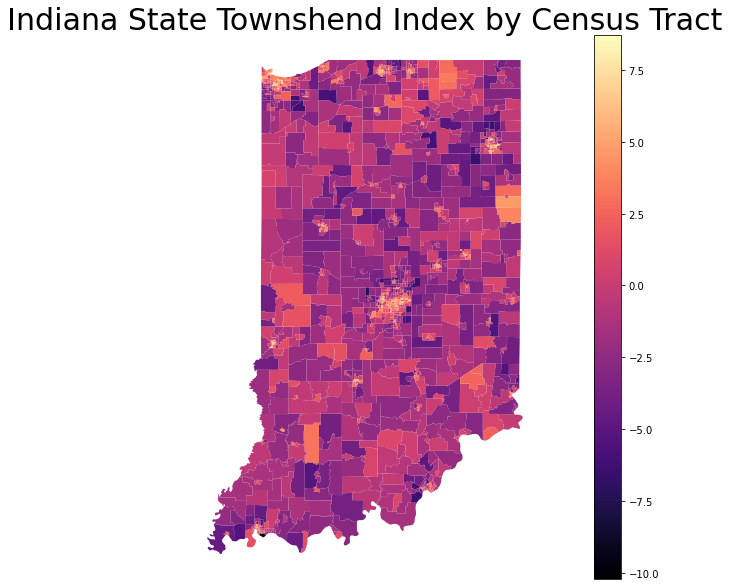

In [27]:
# These help the maps display nicely in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

indiana.plot(column = 'townshend_index', cmap = 'magma', legend = True) 
bounds = indiana.bounds.iloc[0]
minx = bounds["minx"]
miny = bounds["miny"]

# plt.text(minx + 1, miny - 0.3, 'Townshend Index of Depreciation', fontsize=14, rotation=90, rotation_mode='anchor', verticalalignment = 'top', horizontalalignment = 'right')
plt.title('Indiana State Townshend Index by Census Tract', fontsize = 30)
plt.axis('off'); 
plt.savefig("indiana_townshend_index.jpg")

In [29]:
indiana.explore(column = 'townshend_index', cmap = 'magma', legend = True) 
bounds = indiana.bounds.iloc[0]
minx = bounds["minx"]
miny = bounds["miny"]

# plt.text(minx + 1, miny - 0.3, 'Townshend Index of Depreciation', fontsize=14, rotation=90, rotation_mode='anchor', verticalalignment = 'top', horizontalalignment = 'right')
plt.title('Indiana State Townshend Index by Census Tract', fontsize = 30)
plt.axis('off'); 

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [30]:
indiana.explore() 

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [ ]:
# !pip install --user geopandas folium matplotlib mapclassify

In [35]:
indiana.explore(
     column="townshend_index", # make choropleth based on "BoroName" column
     tooltip="townshend_index", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Set1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="black") # use black outline
    ) 

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [69]:
townshend1 = housing[["DP04_0058PE", "DP04_0077PE", "DP04_0047PE"]]
townshend2 = employment[["DP03_0005PE"]] 
indexval = townshend_index[["townshend_index"]]

In [70]:
indiana_townshend = townshend1.join(townshend2)

In [71]:
indiana_townshend = indiana_townshend.join(indexval)

In [73]:
indiana_townshend = indiana_townshend.rename(columns={"DP04_0058PE": "households_with_no_car", "DP04_0077PE": "over_crowded_households", "DP04_0047PE": "dwellings_renter_occupied", "DP03_0005PE": "unemployment"})



In [74]:
indiana_townshend

,households_with_no_car,over_crowded_households,dwellings_renter_occupied,unemployment,townshend_index
GEO_ID,,,,,
1400000US18001030100,0.9,99.7,13.6,1.2,-3.884747
1400000US18001030200,2.5,99.4,33.7,3.8,-0.346128
1400000US18001030300,0.7,100.0,30.8,0.9,-3.605605
1400000US18001030400,9.1,96.8,3.5,2.5,-1.216254
1400000US18001030500,28.5,84.8,9.7,1.3,2.879288
...,...,...,...,...,...
1400000US18183050300,4.7,96.7,14.1,3.2,0.177149
1400000US18183050400,2.5,99.0,22.9,3.7,-0.560382
1400000US18183050500,6.1,100.0,29.2,3.1,-0.875772


In [76]:
#  indiana_townshend.to_csv('indiana_townshend.csv', encoding='utf-8', index=True)